<a href="https://colab.research.google.com/github/davidmuna/Ad-Click-Prediction/blob/main/Advertising_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 1. Defining the Question

```## A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. My task as a Data Science Consultant is to to help her by creating a model that predicts which individuals are most likely to click on her ads ```

#### 2. Metrics for Success

```## 1. An Accuracy Score of atleast 85%
                                    2. A low RMSE Score
                                    3. Confusion Matrix with more correct predictions than incorrect ones
```

#### 3. Understanding the Context

It is imperative that all entrepreneurs identify all opportunities to advertise and boost their sales in whatever business they are engaged in. More over, online advertisements are a key driver of sales of products and services and its important for entrepreneurs to capitalise on this by identifying peak hours for ads to be clicked, the type of ads that people like, personality traits of site visitors and other demographics of potential clients such as age, employment status, interests, hobbies, career etc. Knowing such information creates an avenue for channeling the right adverts to potential clients and classifying or predicting whether or not they'll click on the ad.

#### 4. Recording the Experimental Design

                              ```## 1. Data Preparation and Cleaning
                                      2. Feature Engineering
                                      3. Exploratory Data Analysis
                                      4. Modelling
                                      5. Cross- Validation and Hyperparameter Tuning
                                      6. Evaluation
```

#### 5. Loading our dataset.

```Loading libraries for cleaning ,plotting and manipulating data using pacman. It installs and loads packages if a package is not installed.```

In [4]:
#installing pacman
#if (!require("pacman")) install.packages("pacman")
pacman :: p_load(pacman, dplyr, tidyverse, GGally, ggplot2, ggthemes, ggvis, httr, lubridate,
  plotly, rio, rmarkdown, shiny, stringr, tidyr, psych, corrplot, caret)

Loading required package: pacman

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pacman’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape’



GGally installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


ggthemes installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘fastmap’, ‘shiny’



ggvis installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘hexbin’, ‘data.table’



plotly installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zip’, ‘openxlsx’

In [6]:
# previewing first 6 records
advertising <- import("advertising.csv")
head(advertising)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [7]:
# checking the size and shape of data
dim(advertising)

[1] 1000   10

In [8]:
# viewing data types using str().
str(advertising)

'data.frame':	1000 obs. of  10 variables:
 $ Daily Time Spent on Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily Internet Usage    : num  256 194 236 246 226 ...
 $ Ad Topic Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : chr  "2016-03-27 00:53:11" "2016-04-04 01:39:02" "2016-03-13 20:35:42" "2016-01-10 02:31:19" ...
 $ Clicked on Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


#### 6. Data Preparation.

In [9]:
# checking for missing data in our columns
colSums(is.na(advertising)) 
# there are no missing records in the data

Daily Time Spent on Site                      Age              Area Income 
                       0                        0                        0 
    Daily Internet Usage            Ad Topic Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked on Ad 
                       0

In [10]:
# checking and dealing with duplicates
# there are no duplicates in the data

duplicated_rows <- advertising[duplicated(advertising),]  
duplicated_rows 

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>


In [11]:
# column names
colnames(advertising) 

[1] "Daily Time Spent on Site" "Age"                     
 [3] "Area Income"              "Daily Internet Usage"    
 [5] "Ad Topic Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked on Ad"

In [12]:
# renaming and standardising columns

names(advertising)[names(advertising) == "Daily Time Spent on Site"] <- "dto_site"
names(advertising)[names(advertising) == "Age"] <- "age"
names(advertising)[names(advertising) == "Area Income"] <- "income"
names(advertising)[names(advertising) == "Daily Internet Usage"] <- "di_usage"
names(advertising)[names(advertising) == "Ad Topic Line"] <- "topic_line"
names(advertising)[names(advertising) == "City"] <- "city"
names(advertising)[names(advertising) == "Male"] <- "gender"
names(advertising)[names(advertising) == "Country"] <- "country"
names(advertising)[names(advertising) == "Timestamp"] <- "timestamp"
names(advertising)[names(advertising) == "Clicked on Ad"] <- "clicked"

# new column names
colnames(advertising) 

[1] "dto_site"   "age"        "income"     "di_usage"   "topic_line"
 [6] "city"       "gender"     "country"    "timestamp"  "clicked"

In [13]:
# converting time variable from character to date and time (POSIXct) format

advertising$timestamp <- as.POSIXct(advertising$timestamp, "%Y-%m-%d %H:%M:%S",tz = "GMT")

In [14]:
# checking final data types

columns = colnames(advertising)
for (column in seq(length(colnames(advertising)))){
    print(columns[column])
    print(class(advertising[, column]))
    cat('\n')
}

[1] "dto_site"
[1] "numeric"

[1] "age"
[1] "integer"

[1] "income"
[1] "numeric"

[1] "di_usage"
[1] "numeric"

[1] "topic_line"
[1] "character"

[1] "city"
[1] "character"

[1] "gender"
[1] "integer"

[1] "country"
[1] "character"

[1] "timestamp"
[1] "POSIXct" "POSIXt" 

[1] "clicked"
[1] "integer"



#### 7. Feature Engineering

In [16]:
# stripping date and time and creating new variables date and hour

advertising$date <- format(advertising$timestamp, "%Y-%m-%d")
advertising$hour <- format(advertising$timestamp, "%H")

# selecting gender, hour and clicked variables
# first line prevents ommission of row records 

options(max.print = 1000000)
hour_clicked <- advertising %>% select(10,12)
head(hour_clicked)

,clicked,hour
,<int>,<chr>
1,0,00
2,0,01
3,0,20
4,0,02
5,0,03
6,0,14


In [17]:
# selecting clicked ads only
hour_clicked2 <- hour_clicked %>% filter(clicked == 0)

# checking if clicked is a factor and previewing
is.factor(hour_clicked2$clicked)
head(hour_clicked2)

[1] FALSE

,clicked,hour
,<int>,<chr>
1,0,00
2,0,01
3,0,20
4,0,02
5,0,03
6,0,14


In [18]:
# number of clicks grouped by hour
# we drop "clicked" feature since its a factor and create a new feature "clicked_new" then populate with 1's  

hour_clicked3 <- hour_clicked2 %>% select(2)
head(hour_clicked3)

,hour
,<chr>
1,00
2,01
3,20
4,02
5,03
6,14


In [20]:
# add new feature after hour feature
new <- hour_clicked3 %>% add_column(clicked_new = 1, .after = 1)

# grouping
new2 <- aggregate(new$clicked_new, by=list(Category=new$hour), FUN=sum)
new2  
# new2 produces columns names as Category and x for hour and clicked_new respectively
# new2 will be used in time series plot under BIVARIATE

Category,x
<chr>,<dbl>
00,19
01,16
02,19
03,19
04,21
05,23
06,16
07,28
08,22


#### 8. Exploratory Data Anaylsis

#### UNIVARIATE

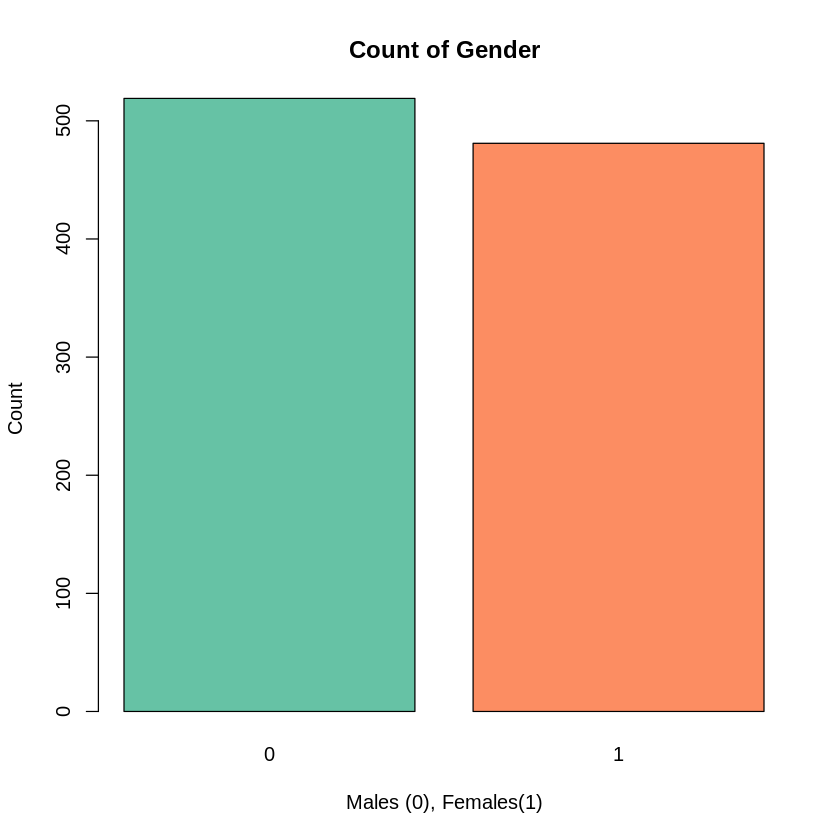

In [21]:
# Categorical Variables using barplots
# Giving color to barplot

library(RColorBrewer)
coul <- brewer.pal(5, "Set2") 

# creating gender table
gender <- table(advertising$gender)

# gender indicates slightly more males(0) than females(1)
barplot(gender,
        col=coul,
        main = "Count of Gender",
        xlab = "Males (0), Females(1)",
        ylab = "Count")  

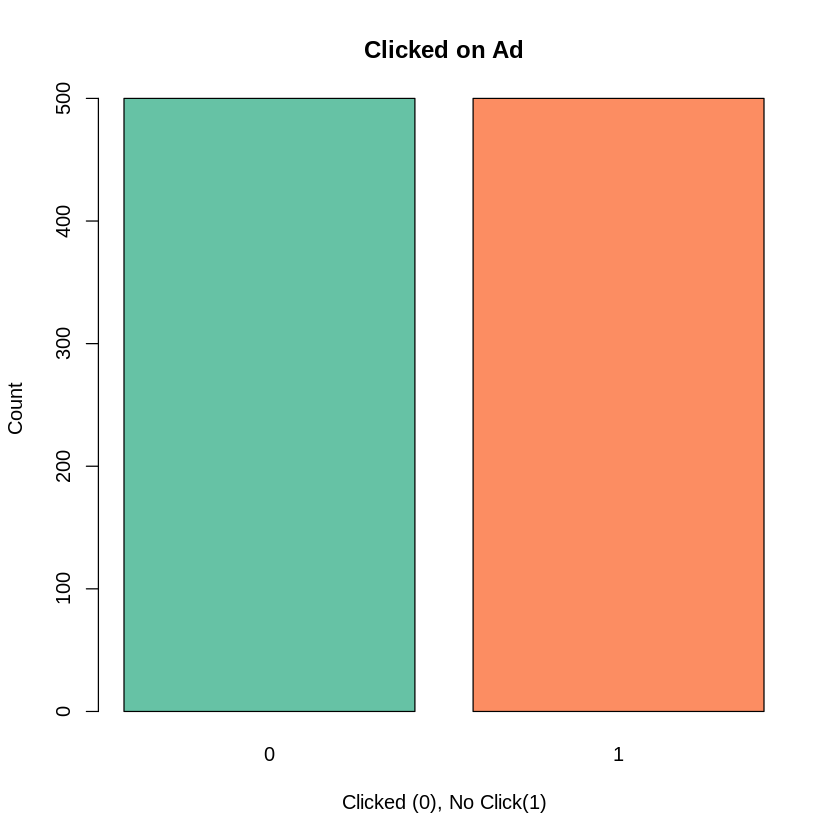

In [22]:
# clicked below indicates that people who clicked and Ad or didnt are the same.
# this means the dataset is balanced

clicked <- table(advertising$clicked)
barplot(clicked,
        col=coul,
        main = "Clicked on Ad",
        xlab = "Clicked (0), No Click(1)",
        ylab = "Count")

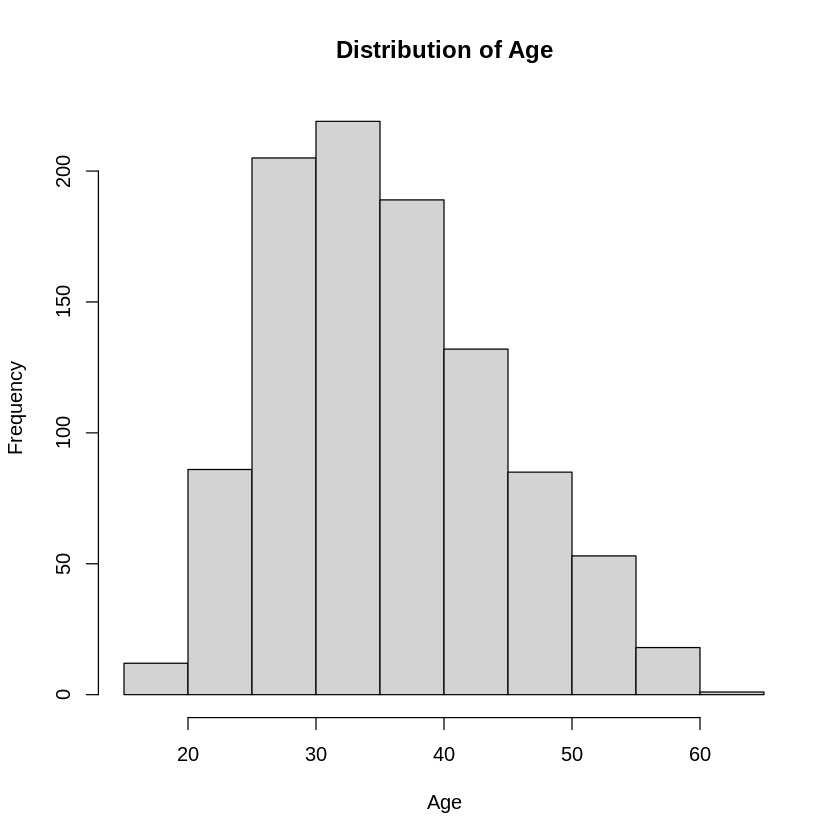

In [23]:
# plotting numerical variables using histograms

# age seems to be slightly skewed to the right indicating younger people visit the site 
hist(advertising$age,
        main = "Distribution of Age",
        xlab = "Age",
        ylab = "Frequency")  

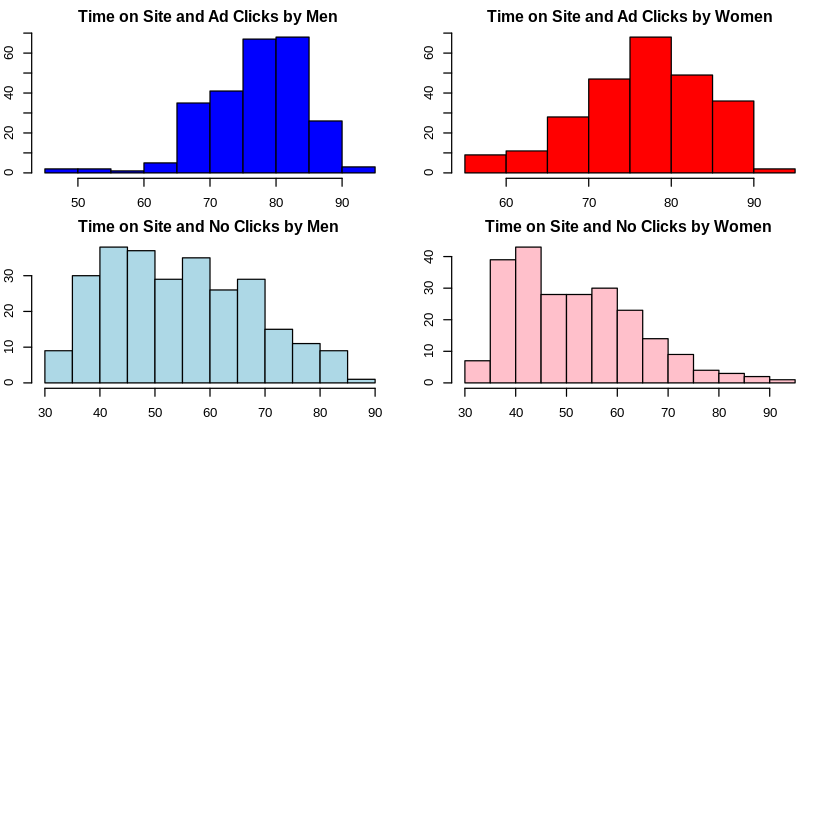

In [24]:
# First line puts graphs into 4 columns with 2 rows
par(mfrow=c(4,2))
par(mar=c(2,2,2,2))

# Histograms of distribution of time spent on site for men and women and whether they clicked on Ads

hist(advertising$dto_site [advertising$clicked == 0 & advertising$gender == 0],
    main = "Time on Site and Ad Clicks by Men ",
    xlab = "Time on Site",
    col = "blue")
    
hist(advertising$dto_site [advertising$clicked == 0 & advertising$gender == 1],
    main = "Time on Site and Ad Clicks by Women",
    xlab = "Time on Site",
    col = "red")
    
hist(advertising$dto_site [advertising$clicked == 1 & advertising$gender == 0],
    main = "Time on Site and No Clicks by Men ",
    xlab = "Time on Site",
    col = "lightblue")
    
hist(advertising$dto_site [advertising$clicked == 1 & advertising$gender == 1],
    main = "Time on Site and No Clicks by Women ",
    xlab = "Time on Site",
    col = "pink")

# reset graph to 1 column 1 row
par(mfrow=c(1,1)) 

We can see with Ad Clicks, women spent more time on the site than men and time spent on site is not normally distributed

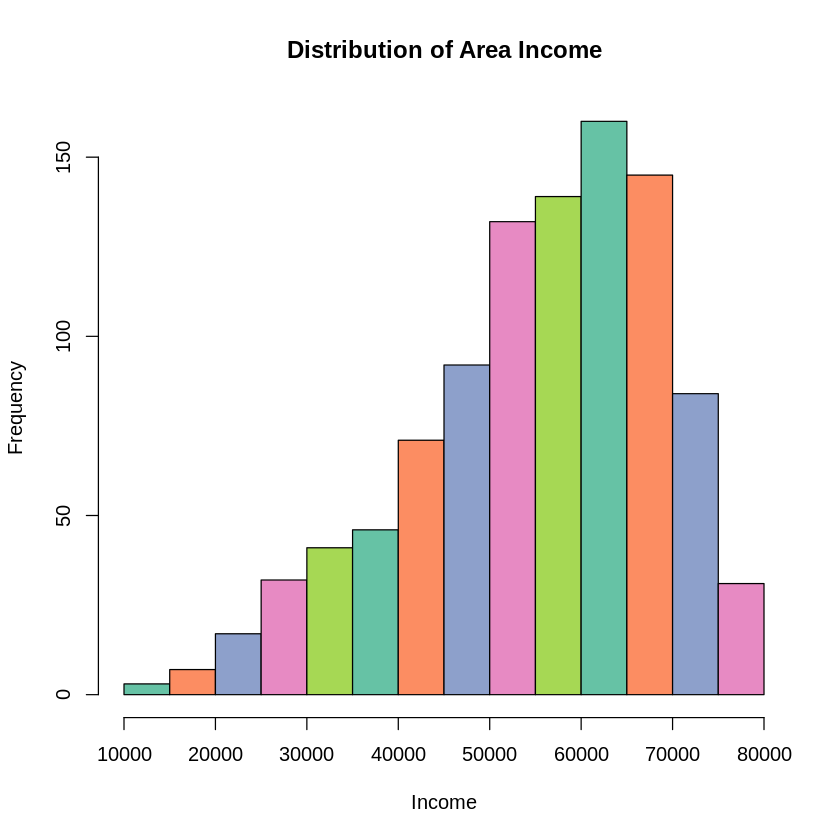

In [25]:
# Area income distribution
hist(advertising$income,
        col=coul,
        main = "Distribution of Area Income",
        xlab = "Income",
        ylab = "Frequency")

Area income distribution is skewed to the left indicating a lot of people have high income

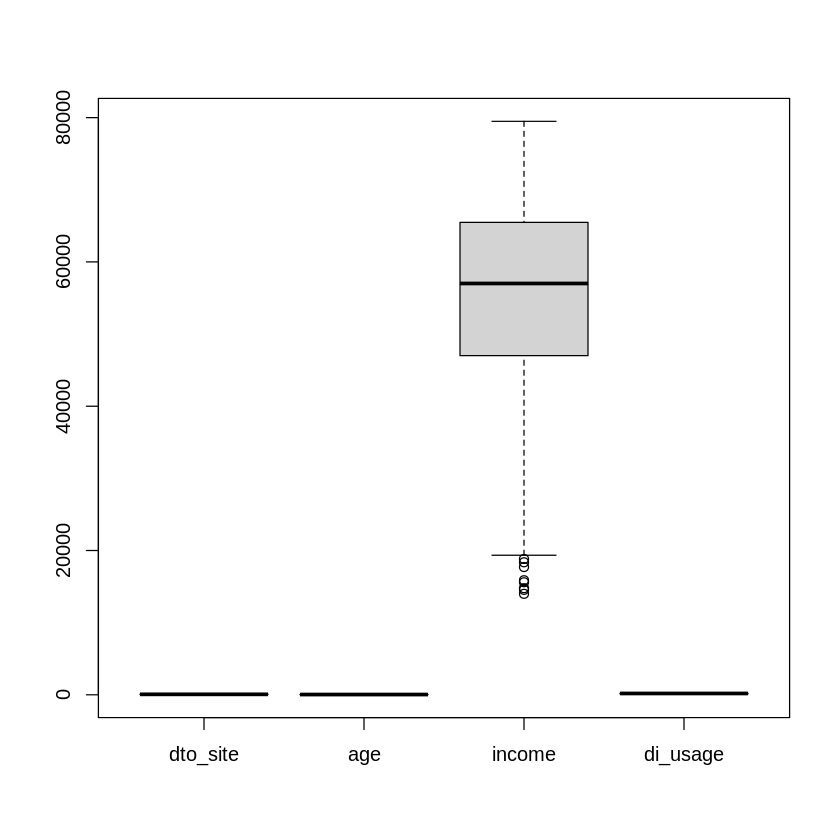

In [26]:
# Plotting Boxplots of numerical variables
num_vars <- advertising %>% select(dto_site,age,income, di_usage)
boxplot(num_vars)

income variable has a few outliers (ie income less than 20,000), other variables are okay

In [27]:
# calculating measures of central tendency and dispersion using summary() to get mean, median, max/min, 1st & 3rd quartiles
summary(num_vars)

    dto_site          age            income         di_usage    
 Min.   :32.60   Min.   :19.00   Min.   :13996   Min.   :104.8  
 1st Qu.:51.36   1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8  
 Median :68.22   Median :35.00   Median :57012   Median :183.1  
 Mean   :65.00   Mean   :36.01   Mean   :55000   Mean   :180.0  
 3rd Qu.:78.55   3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8  
 Max.   :91.43   Max.   :61.00   Max.   :79485   Max.   :270.0  

In [28]:
# using describe() to get range, skewness, kurtosis and standard deviation among others
describe(num_vars)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
dto_site,1,1000,65.0002,15.853615,68.215,65.74090,17.92463,32.60,91.43,58.83,-0.37064595,-1.0998638,0.5013353
age,2,1000,36.0090,8.785562,35.000,35.50625,8.89560,19.00,61.00,42.00,0.47770522,-0.4097066,0.2778239
income,3,1000,55000.0001,13414.634022,57012.300,56038.93815,13316.62424,13996.50,79484.80,65488.30,-0.64842285,-0.1110924,424.2079749
di_usage,4,1000,180.0001,43.902339,183.130,179.98620,58.61459,104.78,269.96,165.18,-0.03343681,-1.2757525,1.3883139


In [31]:
# calculating variance for the numerical variables 
var(num_vars$dto_site)
var(num_vars$age)
var(num_vars$income)
var(num_vars$di_usage)

[1] 251.3371

[1] 77.18611

[1] 179952406

[1] 1927.415

daily time on site ,daily internet usage and area income have very high variance. This indicates the two are highly skewed and are not normally distributed.

In [32]:
# defining a function called mode since mode has no in-built function in R
mode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

# calculating the mode for the numerical variables, this indicates the value that is most common
# or appears the most in each of the variables. For instance, the most common area income is 61833.9 as per the output below
mode(num_vars$dto_site)
mode(num_vars$age)
mode(num_vars$income)
mode(num_vars$di_usage)

[1] 62.26

[1] 31

[1] 61833.9

[1] 167.22

#### BIVARIATE

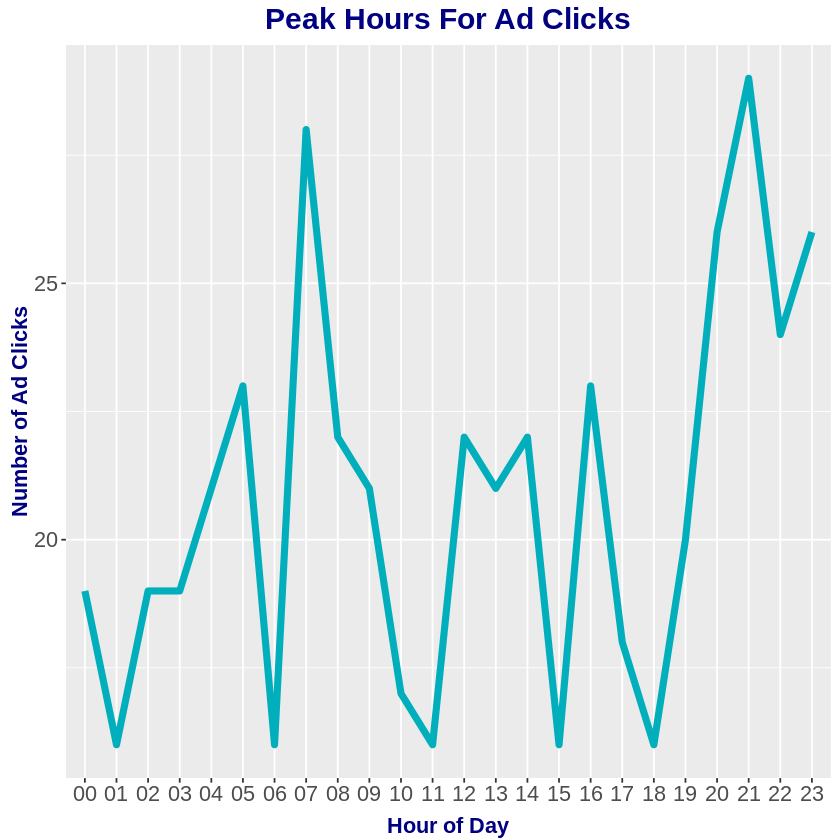

In [33]:
# time series line plot

time_series = ggplot(data = new2, aes(x = Category, y = x, group = 3))+
  geom_line(color = "#00AFBB", size = 2) + labs(title = 'Peak Hours For Ad Clicks', x = 'Hour of Day', y = 'Number of Ad Clicks') +
    theme(plot.title=element_text(size=18, face="bold", color="navyblue",hjust=0.5, lineheight=1.2), 
          plot.subtitle=element_text(size=15, face="bold", hjust=0.5),
         axis.title.x = element_text(color = 'navyblue', size = 13, face = 'bold', vjust = -0.5),
         axis.title.y = element_text(color = 'navyblue', size = 13, face = 'bold', vjust = 0.5),
         axis.text.y = element_text(size = 13),
         axis.text.x = element_text(size = 13),
         legend.title = element_text(size = 13, color = 'navyblue'),
        legend.text = element_text(size = 11))
plot(time_series)

conclusion from the plot above is that our entrepreneur should target advertisements during the peak hours of 7am and 9pm for more clicks and views

In [35]:
# computing a correlation matrix between all numerical variables using pearson method

all_num_vars <- advertising %>% select(dto_site,age,income, di_usage,gender,clicked)
correlations <- cor(all_num_vars, method = "pearson")
round(correlations, 2)

,dto_site,age,income,di_usage,gender,clicked
dto_site,1.00,-0.33,0.31,0.52,-0.02,-0.75
age,-0.33,1.00,-0.18,-0.37,-0.02,0.49
income,0.31,-0.18,1.00,0.34,0.00,-0.48
di_usage,0.52,-0.37,0.34,1.00,0.03,-0.79
gender,-0.02,-0.02,0.00,0.03,1.00,-0.04
clicked,-0.75,0.49,-0.48,-0.79,-0.04,1.00


daily time on site and daily internet usage are strongly correlated to each other with a coefficient of # 0.52 indicating a positive relationship.
the two variables also have a strong negative correlation of -0.79 and -0.75 with the target variable'clicked'

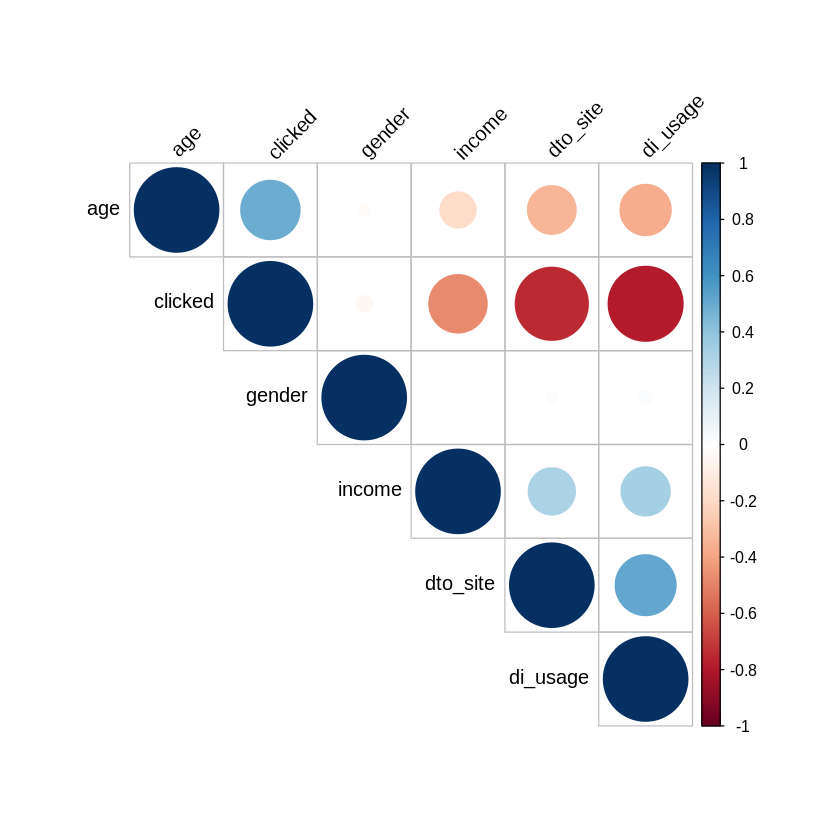

In [36]:
# viewing the correlations better to support the above notions

corrplot(correlations, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

The two large maroon circles indicate strong negative correlations between target variable and time on site/daily internet usage. The last two small blue circles indicate positive correlation between daily internet usage and time spent on site.

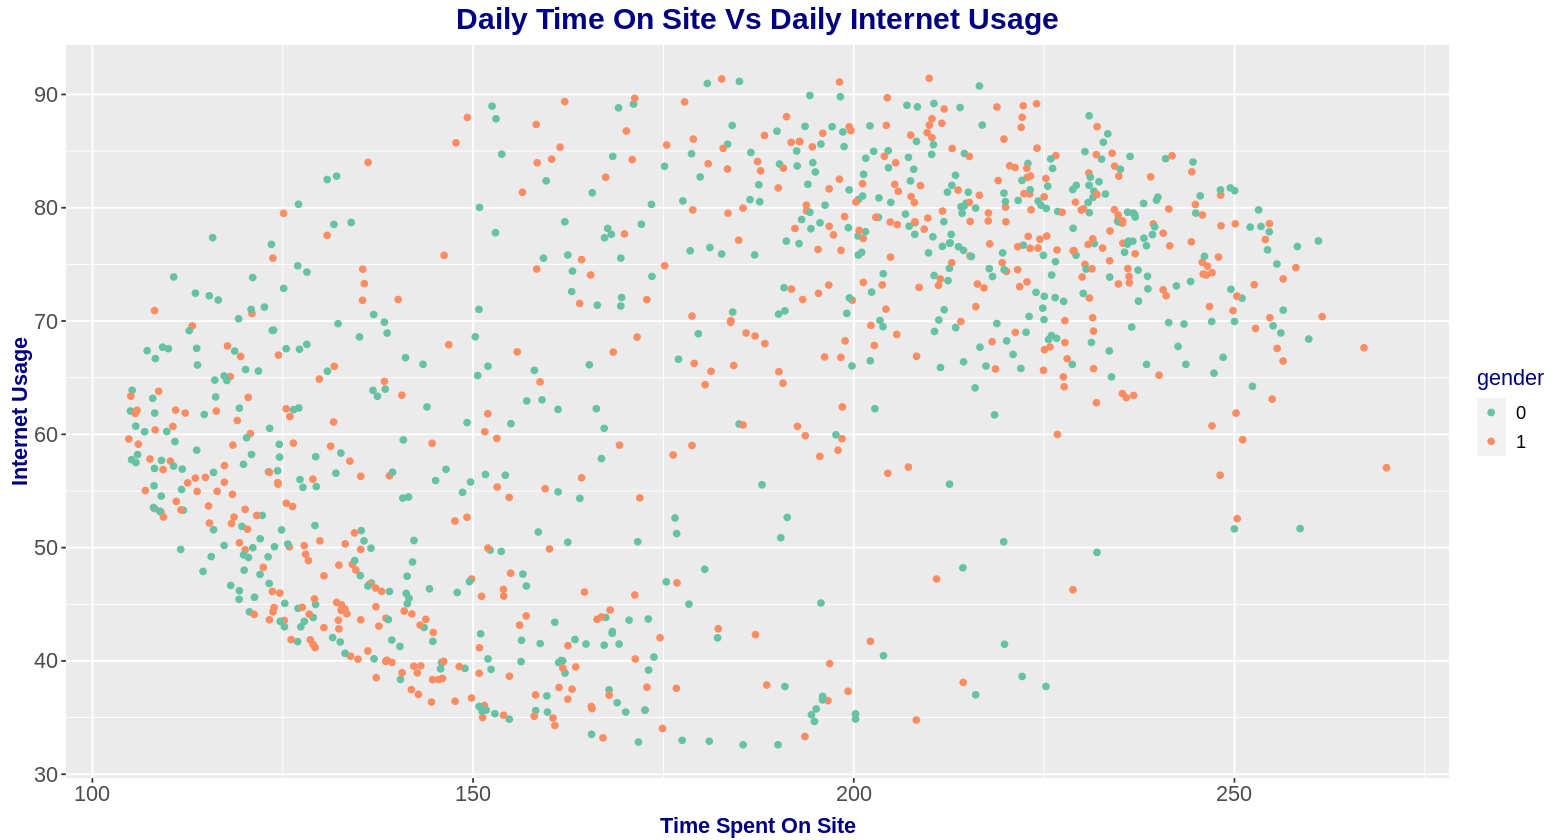

In [37]:
# plotting a scatter plot of daily time spent on site versus daily internet usage

# converting all categorical variables to factors first```
advertising$topic_line <- factor(advertising$topic_line) 
advertising$city <- factor(advertising$city) 
advertising$gender <- factor(advertising$gender) 
advertising$country <- factor(advertising$country) 
advertising$clicked <- factor(advertising$clicked) 

# a scatter plot showing daily time on site vs daily internet usage by gender
options(repr.plot.width = 13, repr.plot.height = 7)

dto_site_di_usage = ggplot(data = advertising, aes(x = di_usage, y = dto_site , col = gender)) + 
    geom_point() + 
    labs(title = 'Daily Time On Site Vs Daily Internet Usage', x = 'Time Spent On Site', y = 'Internet Usage') + 
    scale_color_brewer(palette = 'Set2') +
    theme(plot.title=element_text(size=18, face="bold", color="navyblue",hjust=0.5, lineheight=1.2), 
          plot.subtitle=element_text(size=15, face="bold", hjust=0.5),
         axis.title.x = element_text(color = 'navyblue', size = 13, face = 'bold', vjust = -0.5),
         axis.title.y = element_text(color = 'navyblue', size = 13, face = 'bold', vjust = 0.5),
         axis.text.y = element_text(size = 13),
         axis.text.x = element_text(size = 13),
         legend.title = element_text(size = 13, color = 'navyblue'),
        legend.text = element_text(size = 11))
        
plot(dto_site_di_usage)

from the plot above, there seems to be some not so perfect relationship between internet usage and time on the site. Time on site is lower when internet usage is lower and vice versa as seen by the dense dots at the bottom left and top right sections of the plot. This means internet usage and time on site goes on both extremes, either low or high.

In [ ]:
# visualising covariance between daily internet usage and other variables
income_cov <- advertising$income
age_cov <- advertising$age
internetusage <- advertising$di_usage
timeonsite <- advertising$dto_site

cov(internetusage, timeonsite)
cov(internetusage, income_cov)
cov(internetusage, age_cov)

we can see from the results that internet usage and income have a very high covariance indicating a strong relationship. internet usage and age negative covariance suggests that as younger people have higher internet usage but the relationship is not perfect or linear


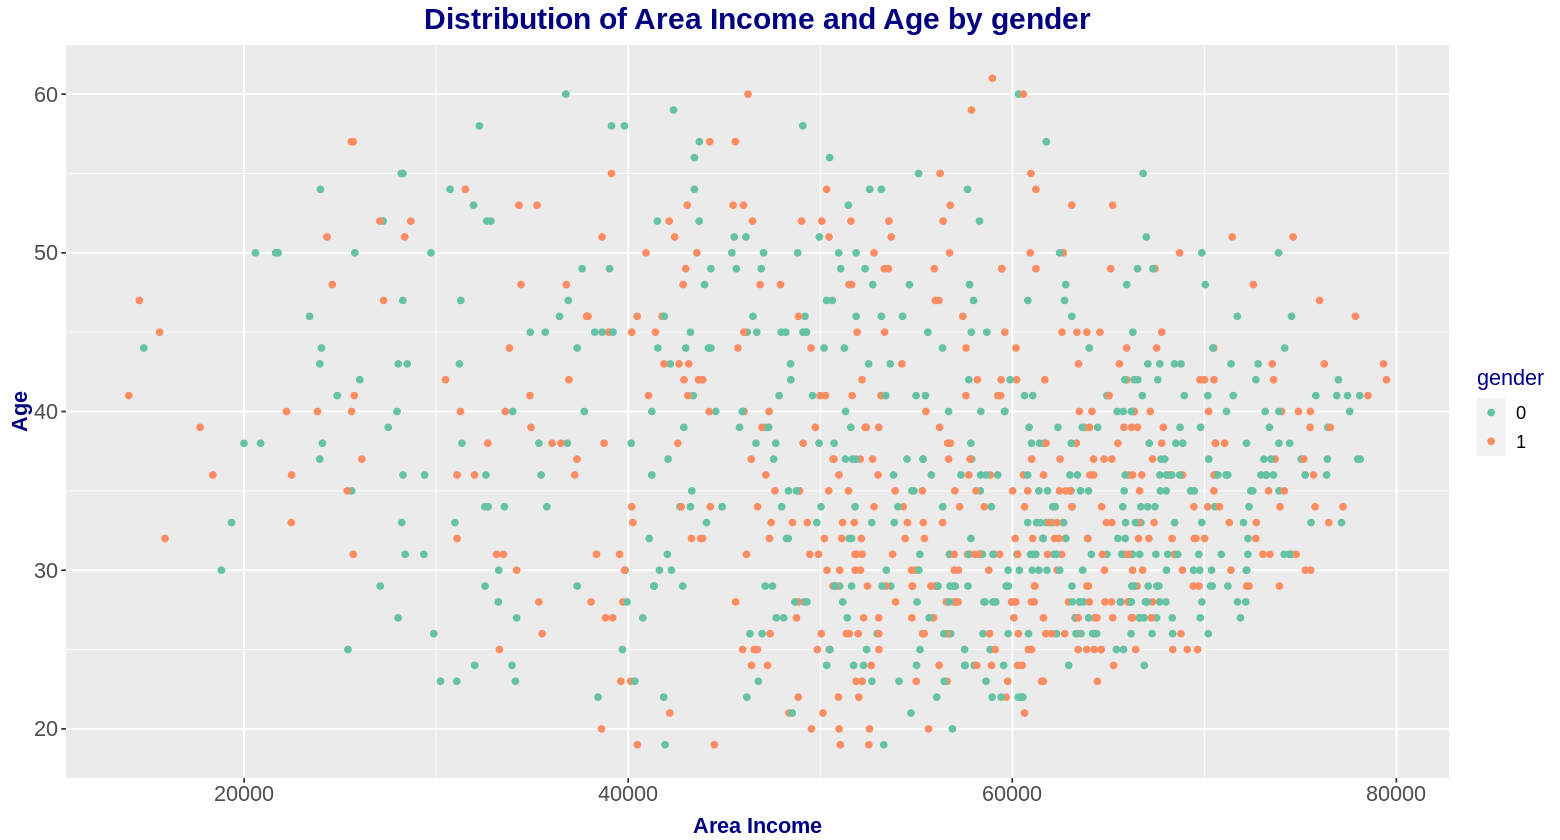

In [38]:
# scatterplot of income and age by gender

options(repr.plot.width = 13, repr.plot.height = 7)

income_age = ggplot(data = advertising, aes(x = income, y = age , col = gender)) + 
    geom_point() + 
    labs(title = 'Distribution of Area Income and Age by gender', x = 'Area Income', y = 'Age') + 
    scale_color_brewer(palette = 'Set2') +
    theme(plot.title=element_text(size=18, face="bold", color="navyblue",hjust=0.5, lineheight=1.2), 
          plot.subtitle=element_text(size=15, face="bold", hjust=0.5),
         axis.title.x = element_text(color = 'navyblue', size = 13, face = 'bold', vjust = -0.5),
         axis.title.y = element_text(color = 'navyblue', size = 13, face = 'bold', vjust = 0.5),
         axis.text.y = element_text(size = 13),
         axis.text.x = element_text(size = 13),
         legend.title = element_text(size = 13, color = 'navyblue'),
        legend.text = element_text(size = 11))
        
plot(income_age)

from the plot we can say that majority of people are within the ages of 25-45 years and earn incomes between the range of 40,000-80,000.


#### dealing with outliers



```## from the boxplots in univariate analysis, there were outliers in the area income that caused its distribution to be skewed.We retain them since income can be skewed in real life scenario.```


#### dealing with missing data

```## theres no missing data in our dataset```

#### BIVARIATE RECOMMENDATIONS

```## to conduct a better bivariate analysis, more variables such as personality traits, interests of site visitors and site visitors' profession(student, salesman, broker etc) need to be captured.```



```## additionally, my recommendation is to implement the solution by creating a model that predicts whether a person will click an Ad or not.```

#### 9. Implementing the Solution.

NB: To implement asap